## Loading paths

In [13]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import random
from torchvision.transforms import v2

In [3]:
project_root = Path().resolve().parent
os.chdir(project_root)

In [4]:
from datasets.dataset_utils import ImageDataset
from utils.config_parser import ConfigParser

## load configs and create dataloader

In [5]:
## load configuration of dataset
config_path = os.path.join("configs", "dataset_config.yaml")
config = ConfigParser(config_path=config_path)

In [6]:
# remove normalization to be able to show images
normalize_mean = config.pop("normalize_mean")
normalize_std = config.pop("normalize_std")

## Show sample of augmented images with labels

In [7]:
root_dir = config["root_dir"]
annotations_subdir = config.get("annotations_subdir", "annotations")
processed_subdir = config.get("processed_subdir", "processed")

annotations_file_path = os.path.join(root_dir, annotations_subdir, "train.csv")


In [37]:
transform = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomRotation(degrees=(-45, 45)),
    v2.RandomResizedCrop(size=(224, 224), scale=(0.5, 1)),
    v2.ColorJitter(brightness=0.1, contrast=0.05, saturation=0.1, hue=0.)
])

In [38]:
dt = ImageDataset(
    annotations_file_path=annotations_file_path,
    root_dir=root_dir,
    processed_subdir=processed_subdir,
    transform=transform
)
id_to_label = dt.id_to_label

## Plot transformed images

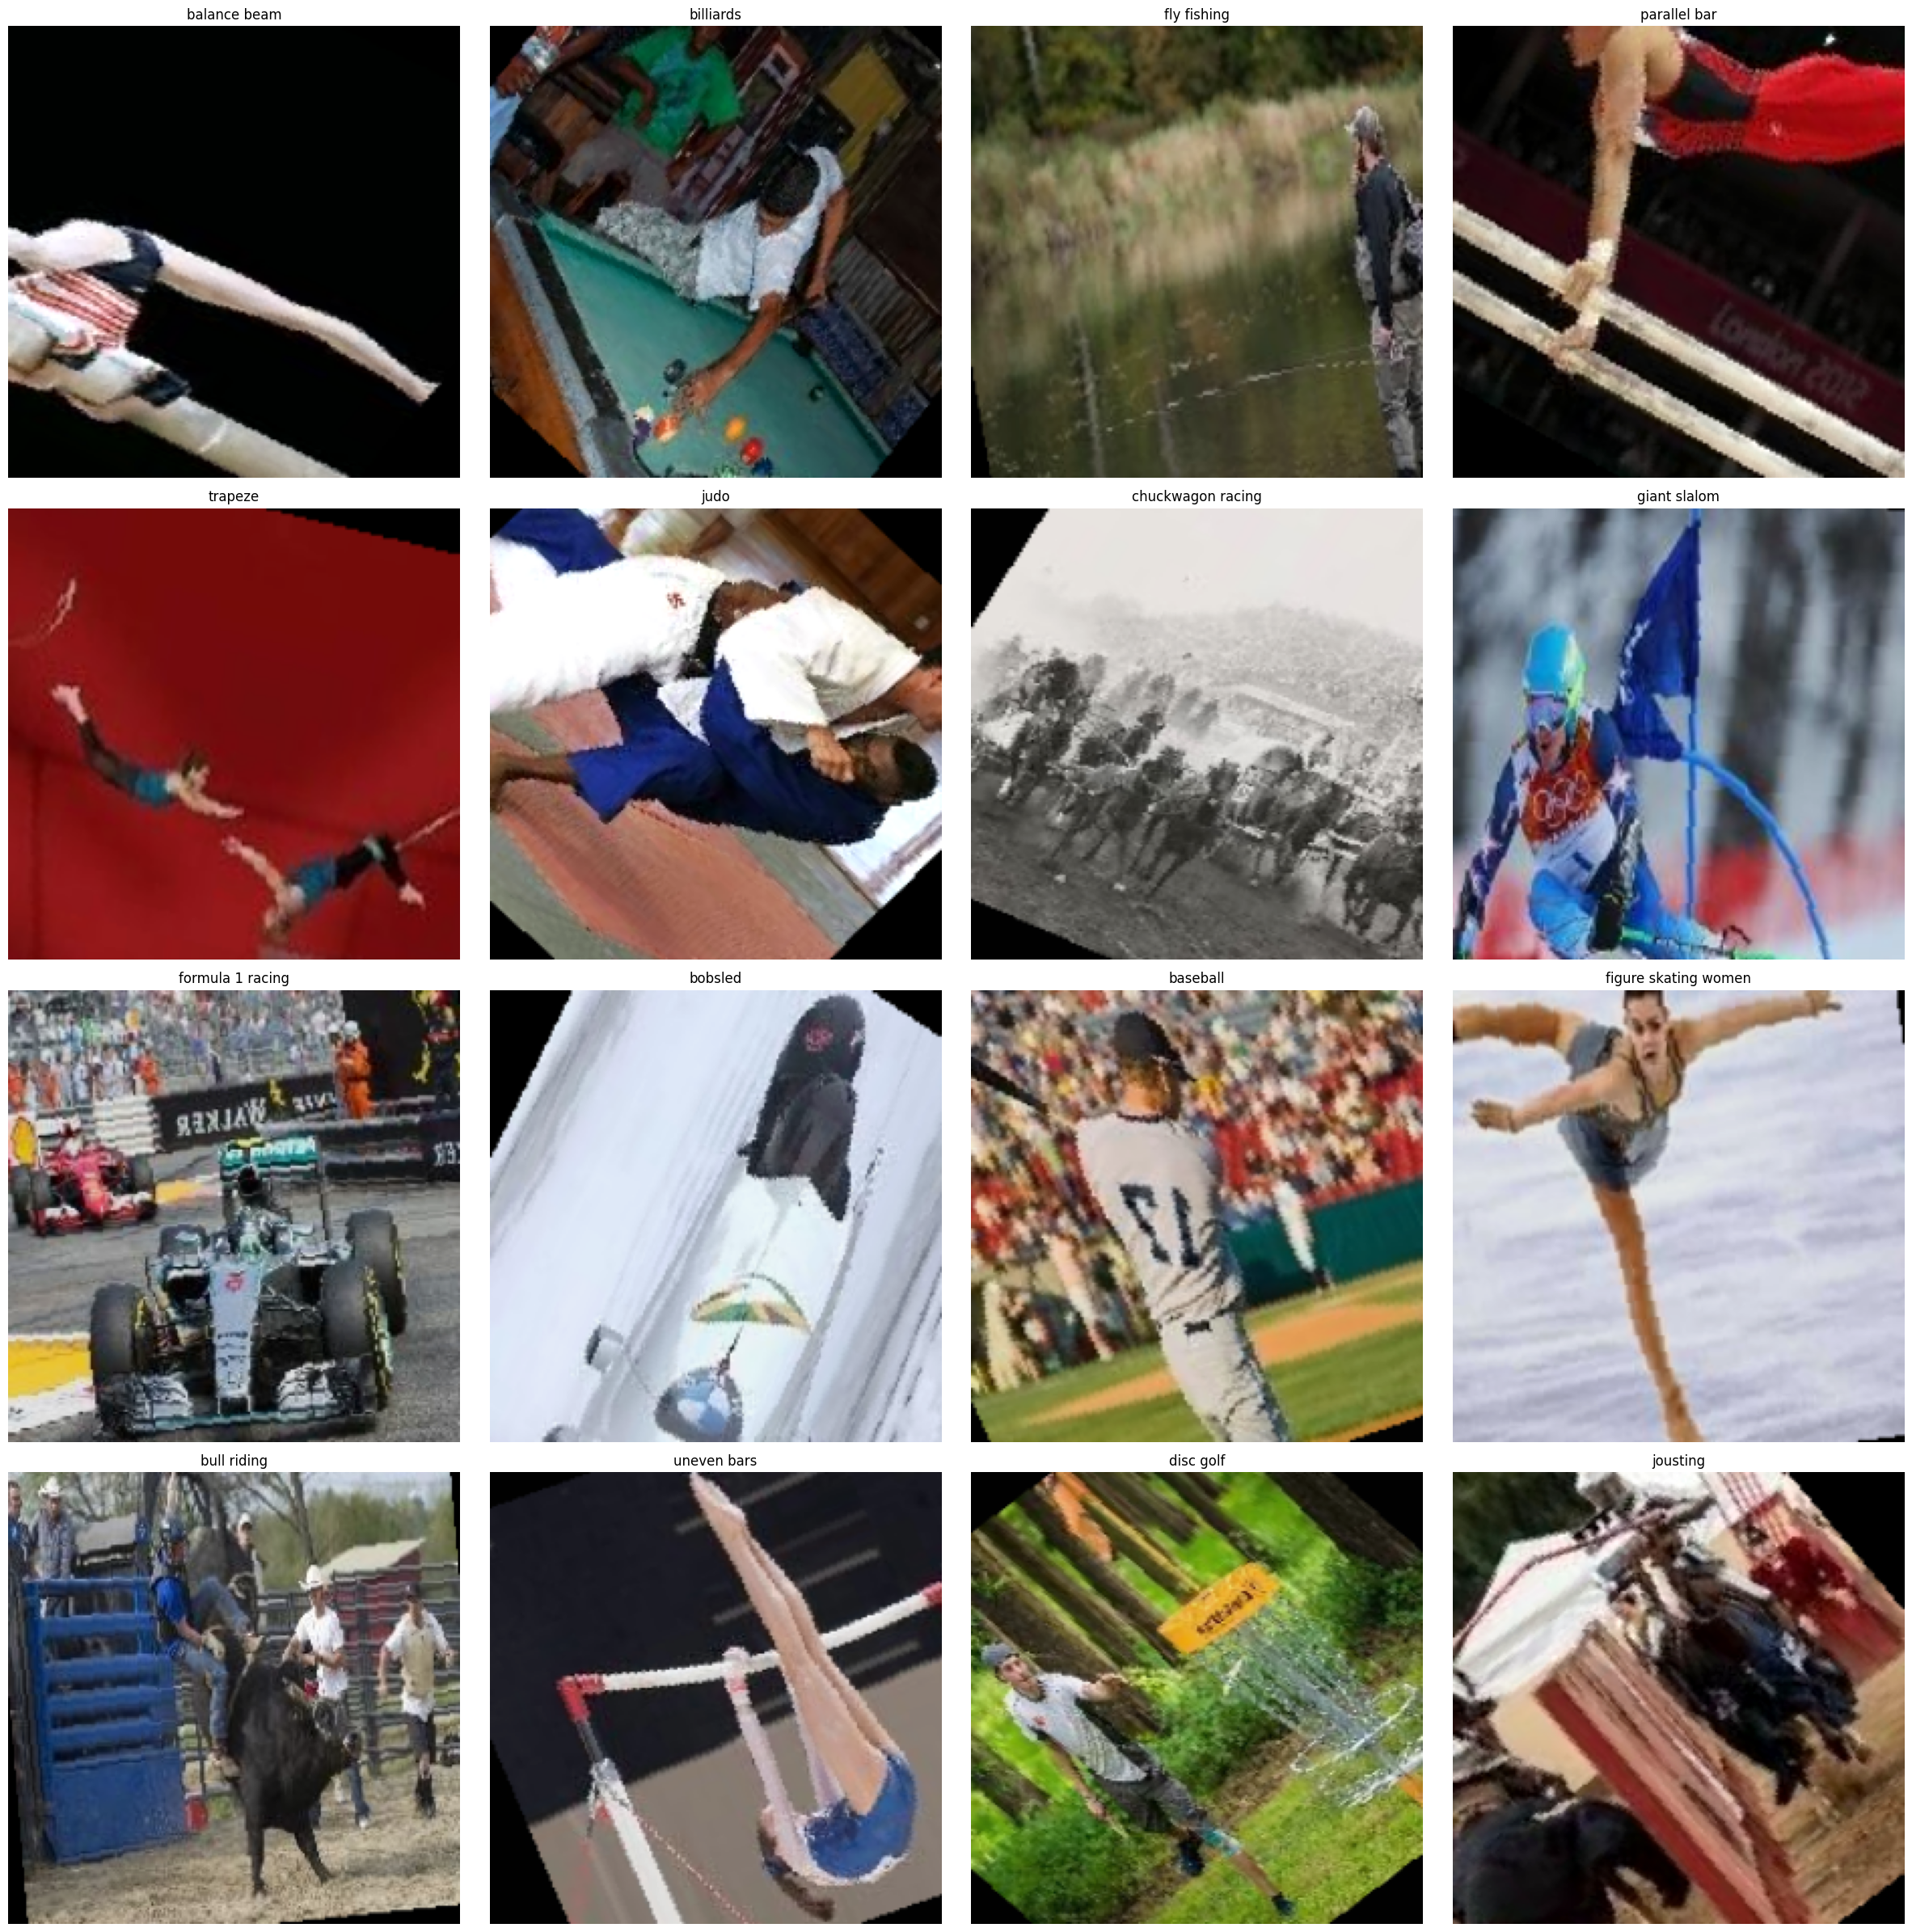

In [39]:
# plot images
batch_idx = random.choices(range(len(dt)), k=16)

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(24, 24))
axs = axs.flatten()

for i, idx in enumerate(batch_idx):
    image, id_label = dt[idx]
    label = id_to_label[id_label]
    image = image.permute(1, 2, 0).numpy()
    axs[i].imshow(image)
    axs[i].set_title(label)
    axs[i].axis("off")

plt.tight_layout()
plt.show()